In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import urllib3
import csv
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #洗牌


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


%matplotlib inline

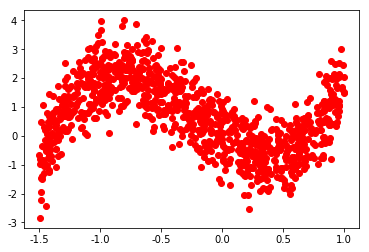

In [2]:
para = 0.5**0.5
e = para*np.random.randn(1000)
x = (2.5*np.random.rand(1000)-1.5).reshape((-1,1))
y = copy.deepcopy(x)
for m,n in enumerate(x):
    y[m] = 3*(n**3) + 2* (n**2) - 3*n + e[m]
#print(y)
plt.plot(x,y,'ro')

In [3]:
k1 = np.tile(x,[1,2])
k2 = np.tile(x,[1,3])
k3 = np.tile(x,[1,4])
k4 = np.tile(x,[1,5])
#print(x)
for n,m in enumerate(k1):
    k1[n] = m**n
for n,m in enumerate(k2):
    k2[n] = m**n
for n,m in enumerate(k3):
    k3[n] = m**n
for n,m in enumerate(k4):
    k4[n] = m**n
x_2 = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x_3 = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)
x_4 = PolynomialFeatures(degree=4, include_bias=True).fit_transform(x)


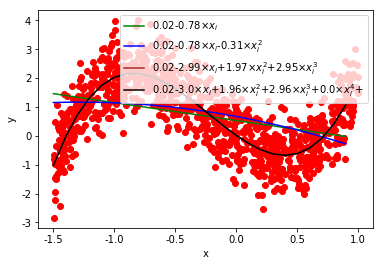

In [13]:
linear_model = LinearRegression().fit(x, y)
x_test = np.arange(-1.5, 1, 0.1).reshape(-1,1)
y_test = linear_model.predict(x_test)

linear_model2 = LinearRegression().fit(x_2, y)
x_test2 = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x_test)
y_test2 = linear_model2.predict(x_test2)

linear_model3 = LinearRegression().fit(x_3, y)
x_test3 = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x_test)
y_test3 = linear_model3.predict(x_test3)

linear_model4 = LinearRegression().fit(x_4, y)
x_test4 = PolynomialFeatures(degree=4, include_bias=True).fit_transform(x_test)
y_test4 = linear_model4.predict(x_test4)
#Input2=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
#pipe2=Pipeline(Input2)
#pipe2.fit(x,y)
#y_test2 = pipe2.predict(x_test)

#label1 = round(linear_model4.intercept_[0],3) +  r'$ \times x_i^{2}$'
#print(y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'ro')
plt.plot(x_test,y_test,color='g',label=
        str(round(linear_model3.intercept_[0],2))+'-'+
         str(abs(round(linear_model2.coef_[0][1],2)))+ r'$ \times x_i$'
        )
plt.plot(x_test,y_test2,color='b',label=
         str(round(linear_model3.intercept_[0],2))+'-'+
         str(abs(round(linear_model2.coef_[0][1],2)))+ r'$ \times x_i$'+'-'+
         str(abs(round(linear_model2.coef_[0][2],2)))+ r'$ \times x_i^{2}$'
        
        )
plt.plot(x_test,y_test3,color='brown',label=
        str(round(linear_model3.intercept_[0],2))+'-'+
         str(abs(round(linear_model3.coef_[0][1],2)))+ r'$ \times x_i$'+'+'+
         str(round(linear_model3.coef_[0][2],2))+ r'$ \times x_i^{2}$'+'+'+
         str(round(linear_model3.coef_[0][3],2))+ r'$ \times x_i^{3}$'
        )
plt.plot(x_test,y_test4,color='black',label= 
         str(round(linear_model4.intercept_[0],2))+'-'+
         str(abs(round(linear_model4.coef_[0][1],2)))+ r'$ \times x_i$'+'+'+
         str(round(linear_model4.coef_[0][2],2))+ r'$ \times x_i^{2}$'+'+'+
         str(round(linear_model4.coef_[0][3],2))+ r'$ \times x_i^{3}$'+'+'+
         str(round(linear_model4.coef_[0][4],2))+ r'$ \times x_i^{4}$'+'+'
        )
#plt.plot(x_test,y_test2,color='b',label='Polynomial Regression')
plt.legend(loc =1)
plt.show()

In [10]:
print(linear_model4.intercept_)
print(linear_model4.coef_)
# r'$ \times x_i^{2}$'

[0.01968043]
[[ 0.         -2.99624972  1.96192585  2.95653315  0.00410207]]


In [6]:
#np.random.randint(2,size=1000)